### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Data Collection and Initial Analysis

In [ ]:
# Loading and examining the dataset
file = "/content/Mall_Customers.csv"
customer_data = pd.read_csv(file)
print("First 5 rows of the dataset:")
display(customer_data.head())

# Displaying dataset information
print("Dataset Info:")
customer_data.info()

# Displaying summary statistics
print("Dataset Description:")
display(customer_data.describe())

# Checking for missing values
print("Missing values in each column:")
print(customer_data.isnull().sum())

# Dropping 'CustomerID' as it's not relevant for clustering
customer_data.drop(["CustomerID"], axis=1, inplace=True)
print("Dataset after dropping 'CustomerID':")
display(customer_data.head())

First 5 rows of the dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
Dataset Description:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Dataset after dropping 'CustomerID':


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Data Visualization

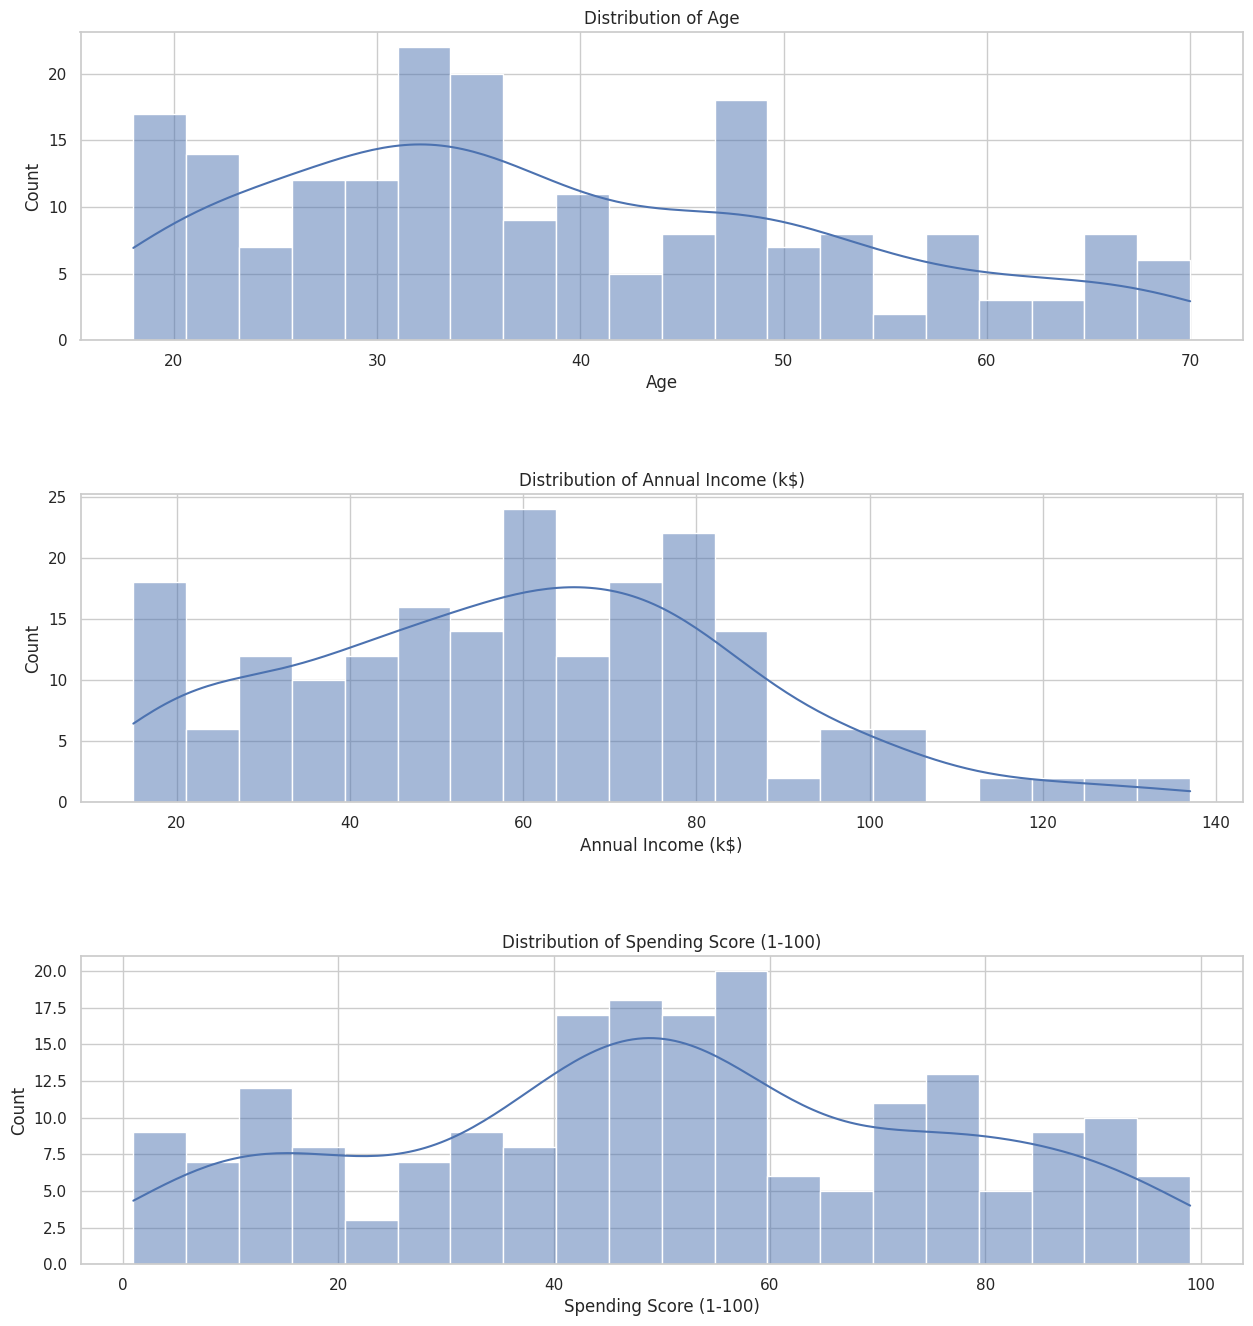

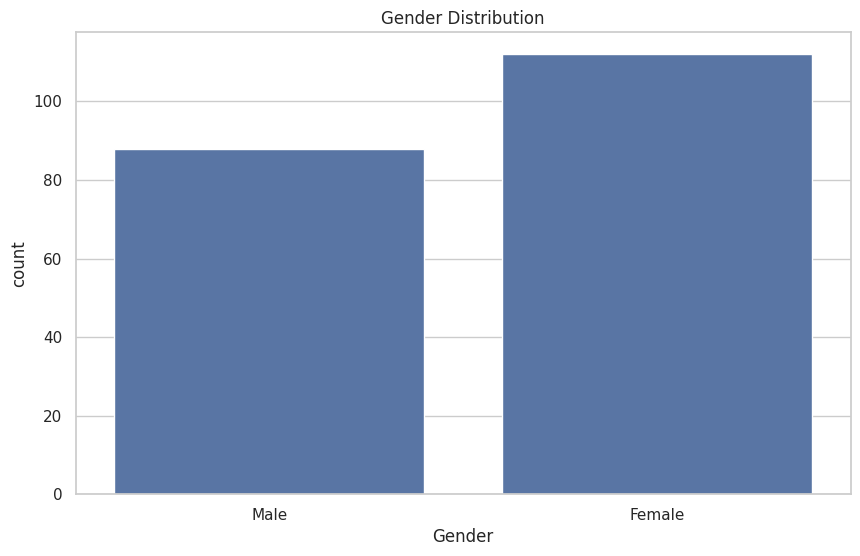

In [ ]:
# Distribution of Age, Annual Income, and Spending Score
plt.figure(figsize=(15, 16))
for i, col in enumerate(["Age", "Annual Income (k$)", "Spending Score (1-100)"], 1):
    plt.subplot(3, 1, i)
    plt.subplots_adjust(hspace=0.5)
    sns.histplot(customer_data[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
plt.show()

# Gender Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="Gender", data=customer_data)
plt.title("Gender Distribution")
plt.show()

<ipython-input-49-a751f3e1ddb4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Gender", y=col, data=customer_data, palette="pastel")
<ipython-input-49-a751f3e1ddb4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Gender", y=col, data=customer_data, palette="pastel")
<ipython-input-49-a751f3e1ddb4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Gender", y=col, data=customer_data, palette="pastel")


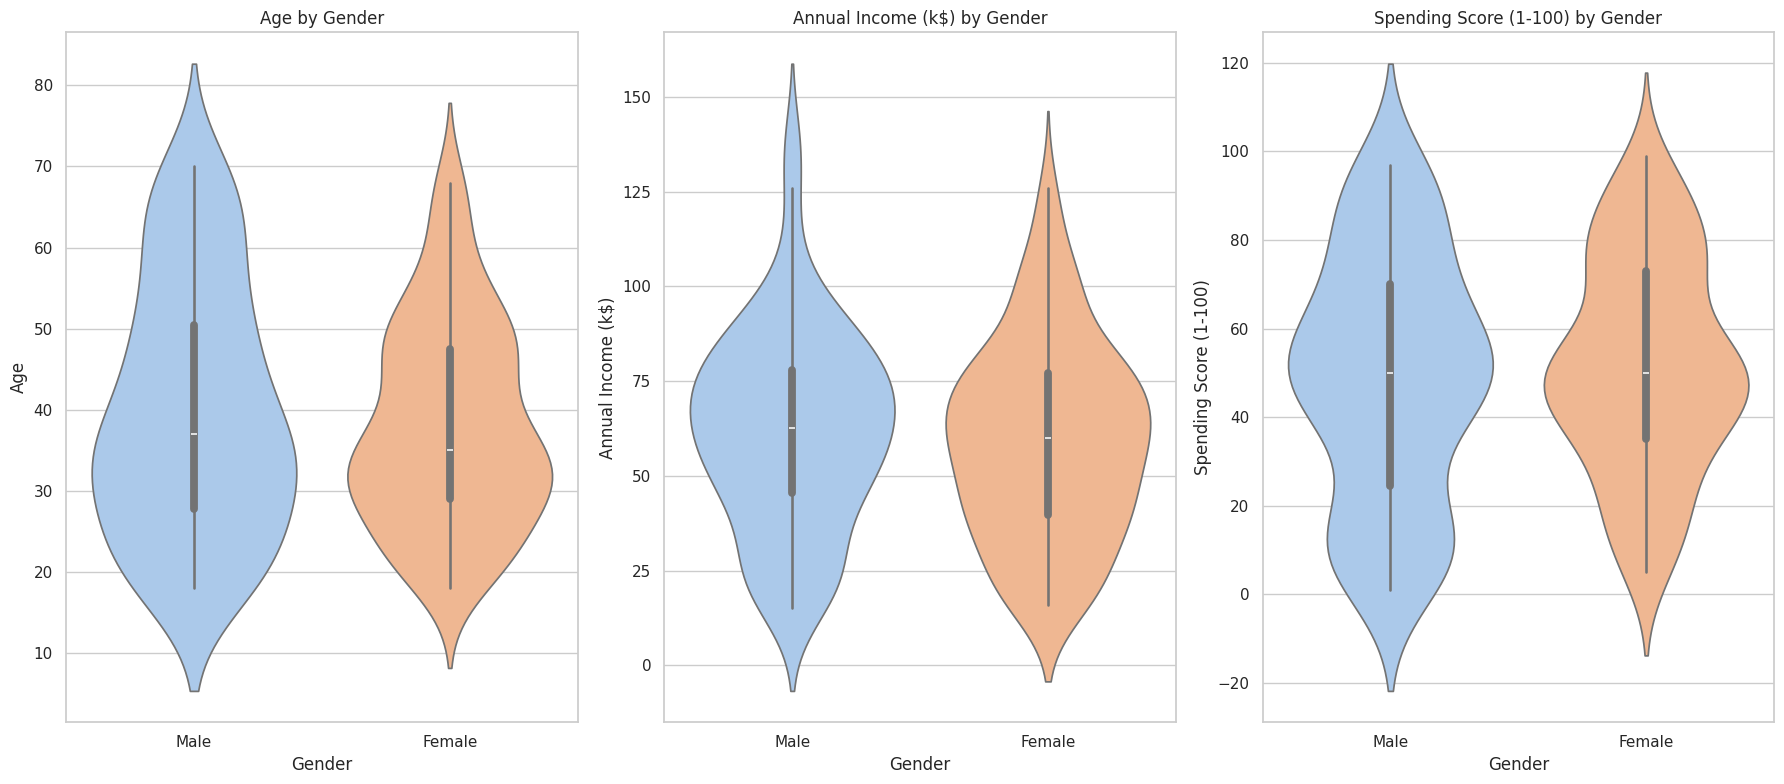

In [ ]:
# Violin plots for Age, Income, and Spending Score by Gender
plt.figure(figsize=(18, 8))
for i, col in enumerate(["Age", "Annual Income (k$)", "Spending Score (1-100)"], 1):
    plt.subplot(1, 3, i)
    sns.violinplot(x="Gender", y=col, data=customer_data, palette="pastel")
    plt.title(f"{col} by Gender")
plt.tight_layout()
plt.show()

### Age Group Distribution

<ipython-input-50-a4a90063db97>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_x, y=age_y, palette="mako")


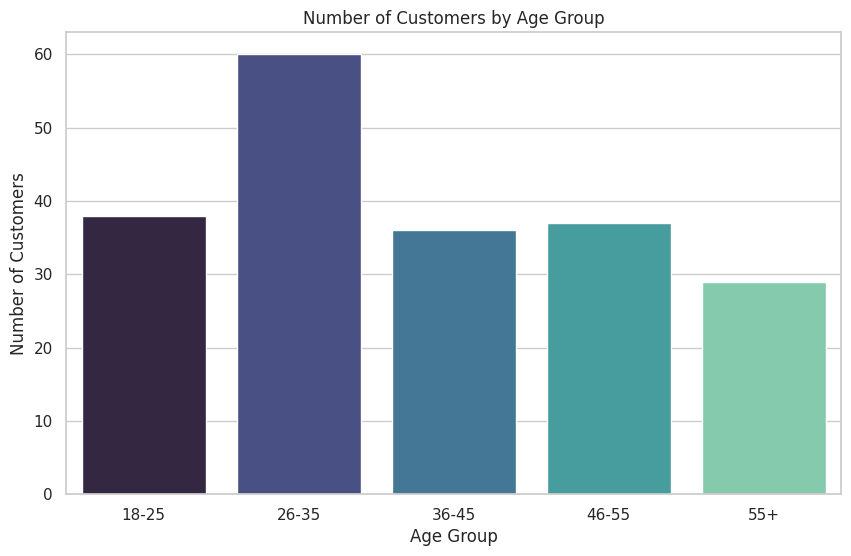

In [ ]:
# Defining age groups
age_groups = {
    "18-25": customer_data.Age[(customer_data.Age >= 18) & (customer_data.Age <= 25)],
    "26-35": customer_data.Age[(customer_data.Age >= 26) & (customer_data.Age <= 35)],
    "36-45": customer_data.Age[(customer_data.Age >= 36) & (customer_data.Age <= 45)],
    "46-55": customer_data.Age[(customer_data.Age >= 46) & (customer_data.Age <= 55)],
    "55+": customer_data.Age[customer_data.Age >= 56]
}

# Plotting age group distribution
age_x = list(age_groups.keys())
age_y = [len(group) for group in age_groups.values()]

plt.figure(figsize=(10, 6))
sns.barplot(x=age_x, y=age_y, palette="mako")
plt.title("Number of Customers by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.show()

### Spending Score Distribution

<ipython-input-51-18080cea30ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ss_x, y=ss_y, palette="rocket")


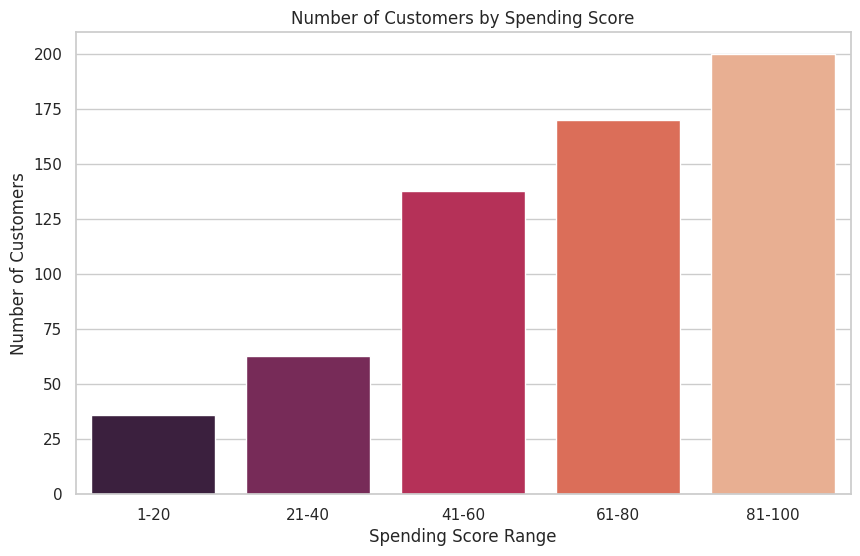

In [ ]:
ss_groups = {
    "1-20": customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] <= 20)],
    "21-40": customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] <= 40)],
    "41-60": customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] <= 60)],
    "61-80": customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] <= 80)],
    "81-100": customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] <= 100)],
}

# Plotting spending score distribution
ss_x = list(ss_groups.keys())
ss_y = [len(group) for group in ss_groups.values()]

plt.figure(figsize=(10, 6))
sns.barplot(x=ss_x, y=ss_y, palette="rocket")
plt.title("Number of Customers by Spending Score")
plt.xlabel("Spending Score Range")
plt.ylabel("Number of Customers")
plt.show()

### Annual Income Distribution

<ipython-input-52-04a9b1724ab4>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_x, y=income_y, palette="Spectral")


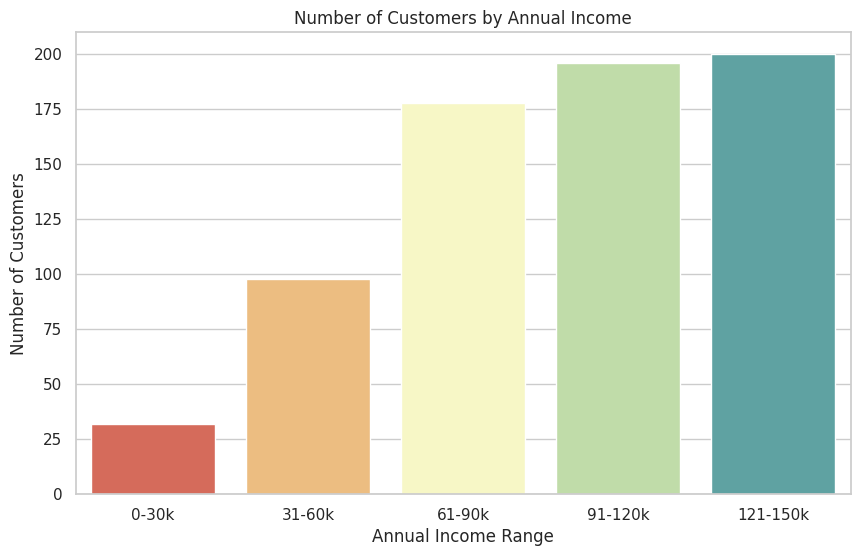

In [ ]:
# Defining income groups
income_groups = {
    "0-30k": customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] <= 30)],
    "31-60k": customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] <= 60)],
    "61-90k": customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] <= 90)],
    "91-120k": customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] <= 120)],
    "121-150k": customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] <= 150)]
}

# Plotting income distribution
income_x = list(income_groups.keys())
income_y = [len(group) for group in income_groups.values()]

plt.figure(figsize=(10, 6))
sns.barplot(x=income_x, y=income_y, palette="Spectral")
plt.title("Number of Customers by Annual Income")
plt.xlabel("Annual Income Range")
plt.ylabel("Number of Customers")
plt.show()

### Clustering Based on Age and Spending Score

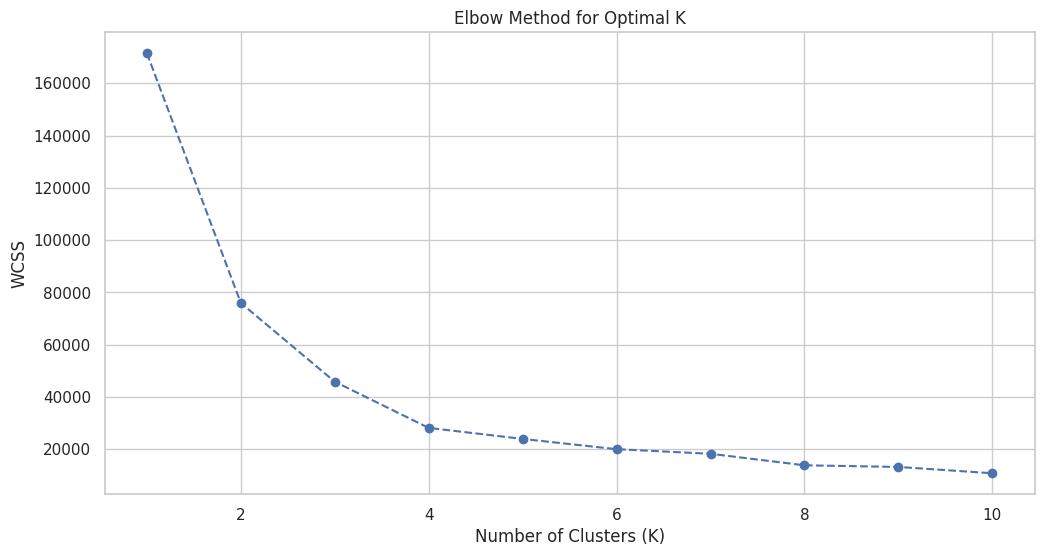

In [ ]:
# Selecting features: Age and Spending Score for clustering
X = customer_data[["Age", "Spending Score (1-100)"]].values

# Determining the optimal number of clusters using the elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method results
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, marker="o", linestyle="--", color="b")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()

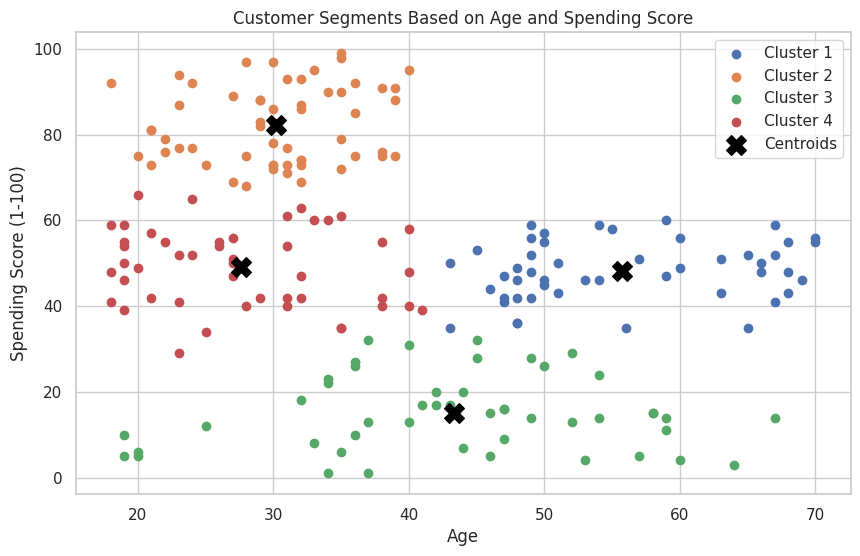

In [ ]:
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=42)
clusters_age_spending = kmeans.fit_predict(X)

# Plotting the clusters
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.scatter(X[clusters_age_spending == i, 0], X[clusters_age_spending == i, 1], label=f"Cluster {i+1}")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, color="black", marker="X", label="Centroids")
plt.title("Customer Segments Based on Age and Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

### Clustering Based on Annual Income and Spending Score

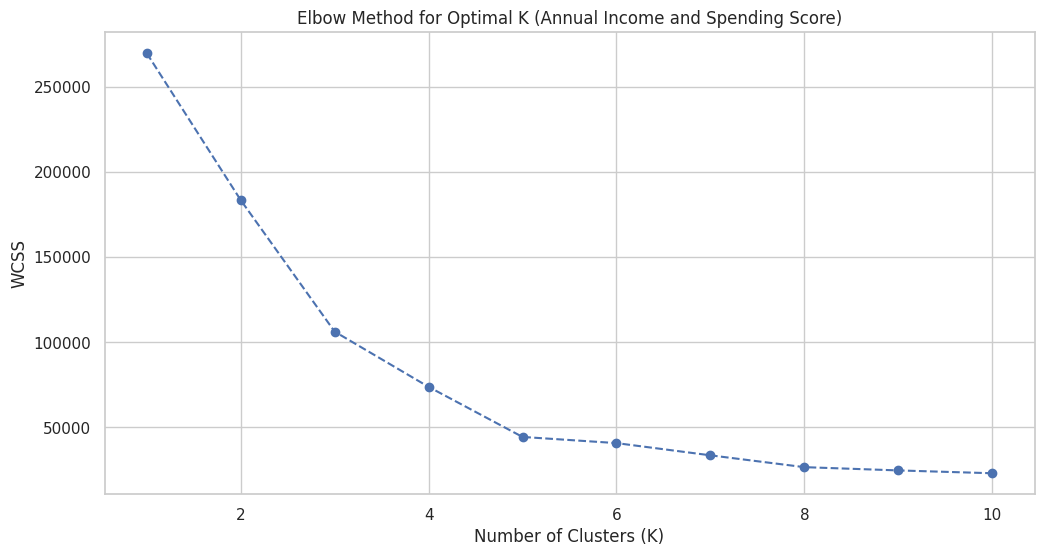

In [ ]:
# Selecting features: Annual Income and Spending Score for clustering
X2 = customer_data[["Annual Income (k$)", "Spending Score (1-100)"]].values

# Determining the optimal number of clusters for Annual Income and Spending Score using the elbow method
wcss_income_spending = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X2)
    wcss_income_spending.append(kmeans.inertia_)

# Plotting the elbow method results for Annual Income and Spending Score
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss_income_spending, marker="o", linestyle="--", color="b")
plt.title("Elbow Method for Optimal K (Annual Income and Spending Score)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()

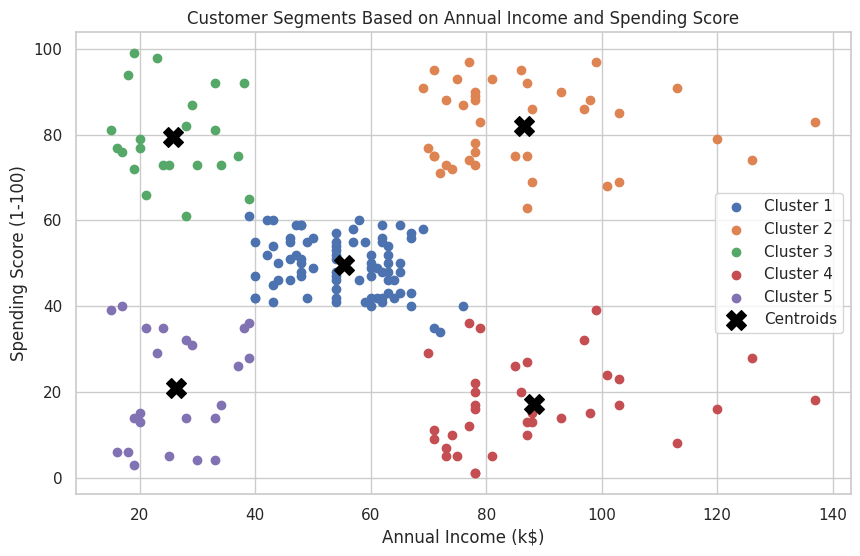

In [ ]:
# Applying K-Means with the optimal number of clusters (e.g., 5)
kmeans_income_spending = KMeans(n_clusters=5, init="k-means++", random_state=42)
clusters_income_spending = kmeans_income_spending.fit_predict(X2)

# Plotting the clusters for Annual Income and Spending Score
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.scatter(X2[clusters_income_spending == i, 0], X2[clusters_income_spending == i, 1], label=f"Cluster {i+1}")
plt.scatter(kmeans_income_spending.cluster_centers_[:, 0], kmeans_income_spending.cluster_centers_[:, 1], s=200, color="black", marker="X", label="Centroids")
plt.title("Customer Segments Based on Annual Income and Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

### Clustering Based on Age, Annual Income, and Spending Score


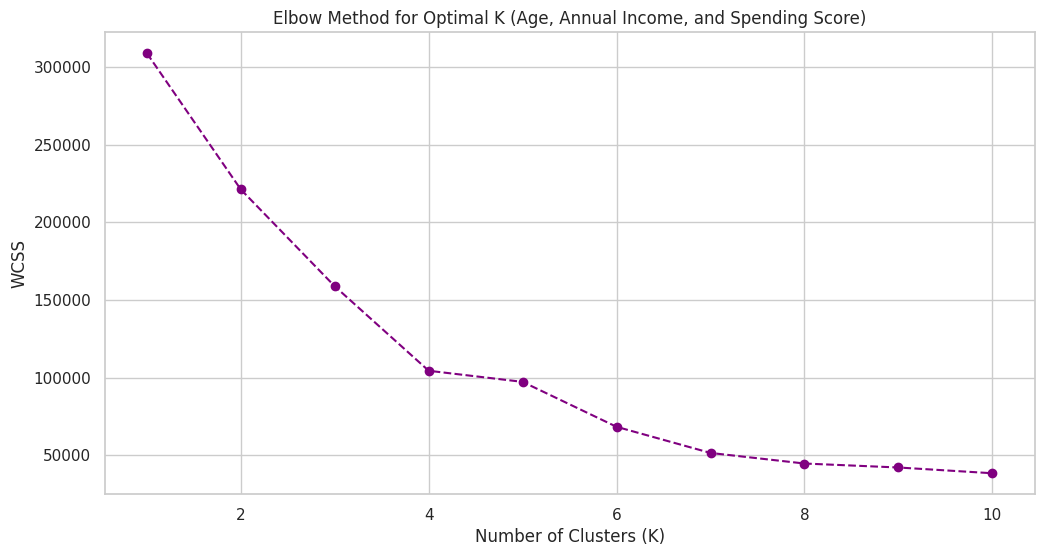

In [ ]:
# Selecting features: Age, Annual Income, and Spending Score for clustering
X3 = customer_data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].values

# Determining the optimal number of clusters for Age, Annual Income, and Spending Score using the elbow method
wcss_age_income_spending = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X3)
    wcss_age_income_spending.append(kmeans.inertia_)

# Plotting the elbow method results for Age, Annual Income, and Spending Score
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss_age_income_spending, marker="o", linestyle="--", color="purple")
plt.title("Elbow Method for Optimal K (Age, Annual Income, and Spending Score)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()

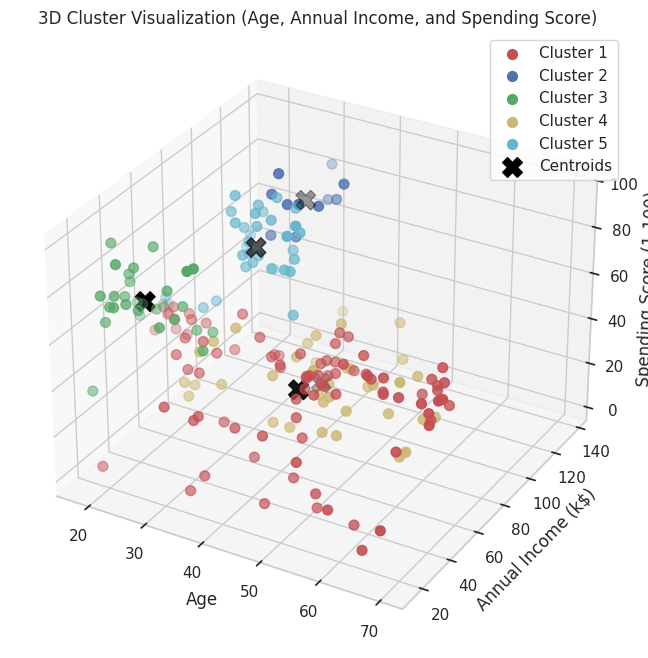

In [ ]:
# Applying K-Means with the optimal number of clusters (e.g., 5)
kmeans_age_income_spending = KMeans(n_clusters=5, init="k-means++", random_state=42)
clusters_age_income_spending = kmeans_age_income_spending.fit_predict(X3)

# Plotting the clusters for Age, Annual Income, and Spending Score in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
colors = ["r", "b", "g", "y", "c"]

for i in range(5):
    ax.scatter(X3[clusters_age_income_spending == i, 0], X3[clusters_age_income_spending == i, 1], X3[clusters_age_income_spending == i, 2],
               s=50, color=colors[i], label=f"Cluster {i+1}")

# Plotting centroids
ax.scatter(kmeans_age_income_spending.cluster_centers_[:, 0], kmeans_age_income_spending.cluster_centers_[:, 1], kmeans_age_income_spending.cluster_centers_[:, 2],
           s=200, color="black", marker="X", label="Centroids")

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
plt.title("3D Cluster Visualization (Age, Annual Income, and Spending Score)")
plt.legend()
plt.show()


In [ ]:
# Add the cluster labels to the original data
customer_data['Cluster (Age-Spending)'] = clusters_age_spending
customer_data['Cluster (Income-Spending)'] = clusters_income_spending
customer_data['Cluster (Age-Income-Spending)'] = clusters_age_income_spending

# Save to a CSV file
customer_data.to_csv("Clustered_Customers.csv", index=False)
